# CNN

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Load the training and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Sample 10% of your training data for testing code functionality
sample_train_df = train_df.sample(frac=0.01, random_state=42)

# Separate features and labels in the training data
X = sample_train_df.drop('label', axis=1)
y = sample_train_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Preprocess the data
X_train_processed = X_train.values.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test_processed = X_test.values.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train_processed = to_categorical(y_train)
y_test_processed = to_categorical(y_test)

# Define a function to create the CNN model
def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model with the given learning rate
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
model = KerasClassifier(build_fn=create_model, learning_rate=0.001, epochs=10, batch_size=64, verbose=0)

param_grid = {'learning_rate': [0.001, 0.01, 0.1],
              'batch_size': [32, 64, 128]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_processed, y_train_processed)

print("Best Parameters: ", grid_result.best_params_)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a 

Best Parameters:  {'batch_size': 32, 'learning_rate': 0.01}


In [49]:
best_model = grid_result.best_estimator_



In [50]:

y_pred_train = best_model.predict(X_train_processed)

# Convert one-hot encoded y_pred_train to categorical labels
y_pred_categorical = np.argmax(y_pred_train, axis=1)

# Convert y_train_processed back to categorical labels
y_train_categorical = np.argmax(y_train_processed, axis=1)

# Calculate accuracy manually
train_accuracy = np.mean(y_pred_categorical == y_train_categorical)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

Train Accuracy: 98.98%


In [51]:
# Use the best model to make predictions on test data
y_pred_test = best_model.predict(X_test_processed)

# Convert one-hot encoded labels to categorical labels
y_test_categorical = np.argmax(y_test_processed, axis=1)

# Calculate accuracy manually
test_accuracy = np.mean(np.argmax(y_pred_test, axis=1) == y_test_categorical)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 84.13%


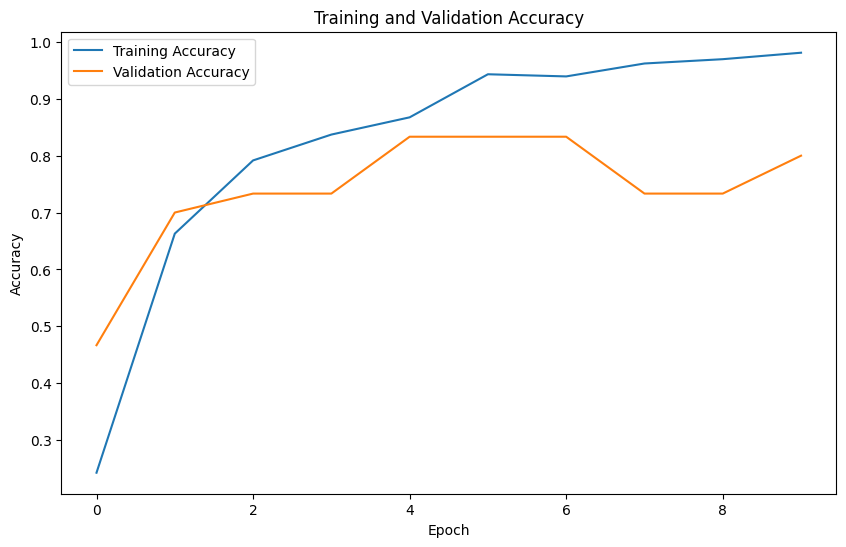

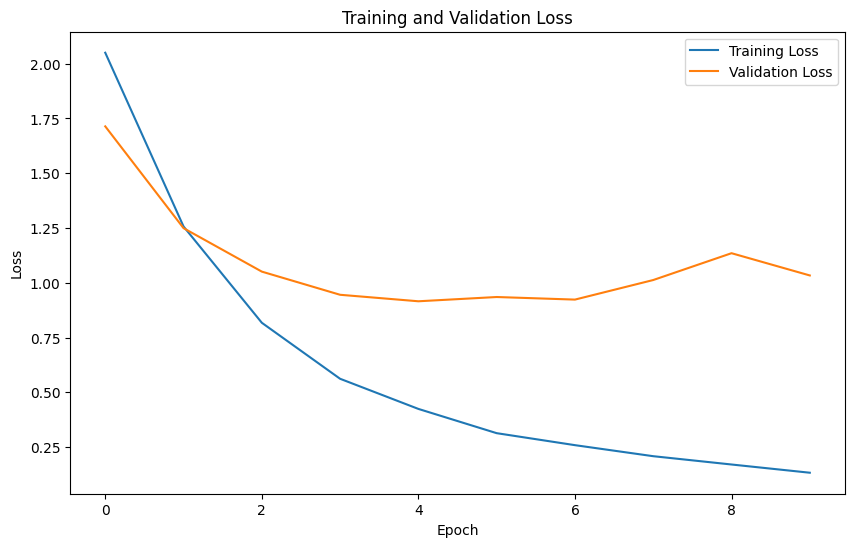

In [52]:
import matplotlib.pyplot as plt

# Access the accuracy and loss from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


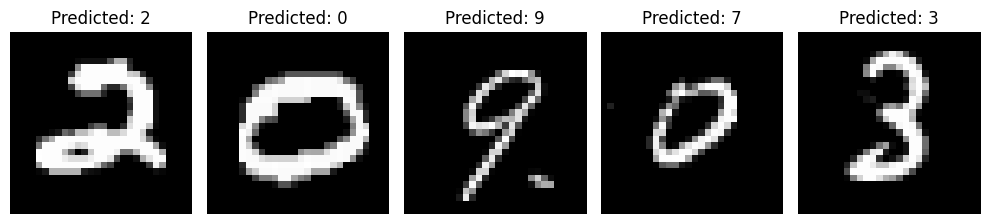

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_pred_test contains predicted classes for test data

# Display first few images and their predicted classes
num_images = 5
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(y_pred_test[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()
